In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import sklearn
import sys
import tensorflow as tf
import time
import random
import pathlib

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


training_path = pathlib.Path('./in_game_profile_dataset/training')
validation_path = pathlib.Path('./in_game_profile_dataset/valid')

train_image_paths = list(training_path.glob('*/*'))  
valid_image_paths = list(validation_path.glob('*/*'))  

train_image_paths = [str(path) for path in train_image_paths]
valid_image_paths = [str(path) for path in valid_image_paths]

random.shuffle(train_image_paths)
random.shuffle(valid_image_paths)
train_image_count = len(train_image_paths)
valid_image_count = len(valid_image_paths)

print("Training Images -> ", train_image_count)
print("Validation Images -> ", valid_image_count)

2.0.0
sys.version_info(major=3, minor=7, micro=5, releaselevel='final', serial=0)
numpy 1.16.4
pandas 0.25.3
sklearn 0.22
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf
Training Images ->  145462
Validation Images ->  17972


In [2]:
train_image_paths[:5]

['in_game_profile_dataset\\training\\Cassiopeia\\gray_2 - Copy - Copy (4) - Copy.png',
 'in_game_profile_dataset\\training\\Katarina\\FbC6fe362d - Copy - Copy - Copy - Copy.png',
 'in_game_profile_dataset\\training\\Xerath\\gray_4 - Copy (21) - Copy.png',
 'in_game_profile_dataset\\training\\Taliyah\\F1ACcEf54a - Copy - Copy (4).png',
 'in_game_profile_dataset\\training\\Miss Fortune\\04FA8e1EAC - Copy (2) - Copy.png']

In [3]:
valid_image_paths[:5]

['in_game_profile_dataset\\valid\\Lee Sin\\gray_8.png',
 'in_game_profile_dataset\\valid\\Zoe\\gray_40.png',
 'in_game_profile_dataset\\valid\\Nami\\gray_10.png',
 'in_game_profile_dataset\\valid\\Jhin\\55b556Dae7 - Copy (9).png',
 'in_game_profile_dataset\\valid\\Thresh\\52EeC565bB - Copy.png']

In [4]:
label_names = sorted(item.name for item in training_path.glob('*/') if item.is_dir())
label_names

['Aatrox',
 'Ahri',
 'Akali',
 'Alistar',
 'Amumu',
 'Anivia',
 'Annie',
 'Aphelios',
 'Ashe',
 'Aurelion Sol',
 'Azir',
 'Bard',
 'Blitzcrank',
 'Brand',
 'Braum',
 'Caitlyn',
 'Camille',
 'Cassiopeia',
 "Cho'Gath",
 'Corki',
 'Darius',
 'Diana',
 'Dr. Mundo',
 'Draven',
 'Ekko',
 'Elise',
 'Evelynn',
 'Ezreal',
 'Fiddlesticks',
 'Fiora',
 'Fizz',
 'Galio',
 'Gangplank',
 'Garen',
 'Gnar',
 'Gragas',
 'Graves',
 'Hecarim',
 'Heimerdinger',
 'Illaoi',
 'Irelia',
 'Ivern',
 'Janna',
 'Jarvan IV',
 'Jax',
 'Jayce',
 'Jhin',
 'Jinx',
 "Kai'Sa",
 'Kalista',
 'Karma',
 'Karthus',
 'Kassadin',
 'Katarina',
 'Kayle',
 'Kayn',
 'Kennen',
 "Kha'Zix",
 'Kindred',
 'Kled',
 "Kog'Maw",
 'LeBlanc',
 'Lee Sin',
 'Leona',
 'Lissandra',
 'Lucian',
 'Lulu',
 'Lux',
 'Malphite',
 'Malzahar',
 'Maokai',
 'Master Yi',
 'Miss Fortune',
 'Mordekaiser',
 'Morgana',
 'Nami',
 'Nasus',
 'Nautilus',
 'Neeko',
 'Nidalee',
 'Nocturne',
 'Nunu & Willump',
 'Olaf',
 'Orianna',
 'Ornn',
 'Pantheon',
 'Poppy',
 'Pyke

In [5]:
training_image_labels = [pathlib.Path(path).parent.name for path in train_image_paths]
for image, label in zip(train_image_paths[:5], training_image_labels[:5]):
    print(image, ' --->  ', label)

in_game_profile_dataset\training\Cassiopeia\gray_2 - Copy - Copy (4) - Copy.png  --->   Cassiopeia
in_game_profile_dataset\training\Katarina\FbC6fe362d - Copy - Copy - Copy - Copy.png  --->   Katarina
in_game_profile_dataset\training\Xerath\gray_4 - Copy (21) - Copy.png  --->   Xerath
in_game_profile_dataset\training\Taliyah\F1ACcEf54a - Copy - Copy (4).png  --->   Taliyah
in_game_profile_dataset\training\Miss Fortune\04FA8e1EAC - Copy (2) - Copy.png  --->   Miss Fortune


In [6]:
train_labels_info = []
for image_path, label in zip(train_image_paths, training_image_labels):
    train_labels_info.append((image_path, label))

In [7]:
import pprint
pprint.pprint(train_labels_info[:5])

[('in_game_profile_dataset\\training\\Cassiopeia\\gray_2 - Copy - Copy (4) - '
  'Copy.png',
  'Cassiopeia'),
 ('in_game_profile_dataset\\training\\Katarina\\FbC6fe362d - Copy - Copy - '
  'Copy - Copy.png',
  'Katarina'),
 ('in_game_profile_dataset\\training\\Xerath\\gray_4 - Copy (21) - Copy.png',
  'Xerath'),
 ('in_game_profile_dataset\\training\\Taliyah\\F1ACcEf54a - Copy - Copy '
  '(4).png',
  'Taliyah'),
 ('in_game_profile_dataset\\training\\Miss Fortune\\04FA8e1EAC - Copy (2) - '
  'Copy.png',
  'Miss Fortune')]


In [8]:
valid_image_labels = [pathlib.Path(path).parent.name for path in valid_image_paths]
for image, label in zip(valid_image_paths[:5], valid_image_labels[:5]):
    print(image, ' --->  ', label)

in_game_profile_dataset\valid\Lee Sin\gray_8.png  --->   Lee Sin
in_game_profile_dataset\valid\Zoe\gray_40.png  --->   Zoe
in_game_profile_dataset\valid\Nami\gray_10.png  --->   Nami
in_game_profile_dataset\valid\Jhin\55b556Dae7 - Copy (9).png  --->   Jhin
in_game_profile_dataset\valid\Thresh\52EeC565bB - Copy.png  --->   Thresh


In [9]:
valid_labels_info = []
for image_path, label in zip(valid_image_paths, valid_image_labels):
    valid_labels_info.append((image_path, label))

In [10]:
pprint.pprint(valid_labels_info[:5])

[('in_game_profile_dataset\\valid\\Lee Sin\\gray_8.png', 'Lee Sin'),
 ('in_game_profile_dataset\\valid\\Zoe\\gray_40.png', 'Zoe'),
 ('in_game_profile_dataset\\valid\\Nami\\gray_10.png', 'Nami'),
 ('in_game_profile_dataset\\valid\\Jhin\\55b556Dae7 - Copy (9).png', 'Jhin'),
 ('in_game_profile_dataset\\valid\\Thresh\\52EeC565bB - Copy.png', 'Thresh')]


In [11]:
train_df = pd.DataFrame(train_labels_info)
valid_df = pd.DataFrame(valid_labels_info)

train_df.columns = valid_df.columns = ['filepath', 'class']

print(train_df.head())
print(valid_df.head())

                                            filepath         class
0  in_game_profile_dataset\training\Cassiopeia\gr...    Cassiopeia
1  in_game_profile_dataset\training\Katarina\FbC6...      Katarina
2  in_game_profile_dataset\training\Xerath\gray_4...        Xerath
3  in_game_profile_dataset\training\Taliyah\F1ACc...       Taliyah
4  in_game_profile_dataset\training\Miss Fortune\...  Miss Fortune
                                            filepath    class
0   in_game_profile_dataset\valid\Lee Sin\gray_8.png  Lee Sin
1      in_game_profile_dataset\valid\Zoe\gray_40.png      Zoe
2     in_game_profile_dataset\valid\Nami\gray_10.png     Nami
3  in_game_profile_dataset\valid\Jhin\55b556Dae7 ...     Jhin
4  in_game_profile_dataset\valid\Thresh\52EeC565b...   Thresh


In [12]:
height = 24
width = 24
channels = 3
batch_size = 128
num_classes = 150

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    #像素值 都除以255
    rescale = 1./255,
    # 图片随机旋转 (5度以内)
    rotation_range = 20,
    # 图片左右位移  20%限度以内
    width_shift_range = 0.2,
    # 图片上下位移  20%限度以内
    height_shift_range = 0.2,
    # 图像剪切强度
    shear_range = 0.2,
    # 图像缩放强度
    zoom_range = 0.2,
    # 是否水平翻转
    horizontal_flip = False,
    # 放大缩小吼， 像素填充方式
    fill_mode = 'nearest',
)

train_generator = train_datagen.flow_from_dataframe(train_df, directory = './',
                                                    x_col = 'filepath',
                                                    y_col = 'class',
                                                    classes = label_names,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 2333,
                                                    shuffle = True,
                                                    class_mode = "categorical")

valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
)
valid_generator = valid_datagen.flow_from_dataframe(valid_df, directory = './',
                                                    x_col = 'filepath',
                                                    y_col = 'class',
                                                    classes = label_names,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 666,
                                                    shuffle = True,
                                                    class_mode = "categorical")


Found 145462 validated image filenames belonging to 149 classes.
Found 17972 validated image filenames belonging to 149 classes.


In [13]:
train_num = train_generator.samples
valid_num = valid_generator.samples

print("Training Generator Sample -> ", train_num)
print("Validation Generator Sample -> ", valid_num)

Training Generator Sample ->  145462
Validation Generator Sample ->  17972


In [14]:
for i in range(2):
    x, y = train_generator.next()
    print(x.shape, y.shape)
    print(y)

(128, 60, 60, 3) (128, 149)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(128, 60, 60, 3) (128, 149)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
model = keras.models.Sequential([
     
    keras.layers.Conv2D(filters=16, kernel_size = 3, padding='same',
                       activation = 'selu', input_shape = [width, height, channels]),
    keras.layers.Conv2D(filters=16, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=32, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.Conv2D(filters=32, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=64, kernel_size = 3, padding='same',
                       activation = 'selu', input_shape = [width, height, channels]),
    keras.layers.Conv2D(filters=64, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'selu'),
    keras.layers.AlphaDropout(rate=0.5),
    
    keras.layers.Dense(num_classes, activation = 'softmax')
])

model.compile(loss="categorical_crossentropy",
             optimizer = "adam", metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        1

In [16]:
logdir = './mini_map_face_recognition'
if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file = os.path.join(logdir, "mini_map_face_recognition.h5")

callbacks = [
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
]

In [17]:
epochs = 15
#因为数据是generator 产生的 所以不能用fit函数
history = model.fit_generator(train_generator, steps_per_epoch=train_num // batch_size,
                             epochs=epochs, validation_data=valid_generator,
                             validation_steps=valid_num//batch_size)

Epoch 1/15
1136/1136 [==============================] - 221s 195ms/step - loss: 1.4337 - accuracy: 0.6436 - val_loss: 0.0061 - val_accuracy: 0.9985
Epoch 2/15
1136/1136 [==============================] - 222s 195ms/step - loss: 0.2520 - accuracy: 0.9238 - val_loss: 0.0102 - val_accuracy: 0.9956
Epoch 3/15
1136/1136 [==============================] - 223s 196ms/step - loss: 0.1769 - accuracy: 0.9479 - val_loss: 0.0586 - val_accuracy: 0.9945
Epoch 4/15
1136/1136 [==============================] - 221s 195ms/step - loss: 0.1416 - accuracy: 0.9591 - val_loss: 1.4966e-07 - val_accuracy: 1.0000
Epoch 5/15
1136/1136 [==============================] - 220s 194ms/step - loss: 0.1353 - accuracy: 0.9630 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 6/15
1136/1136 [==============================] - 226s 199ms/step - loss: 0.1185 - accuracy: 0.9690 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 7/15
1136/1136 [==============================] - 224s 198ms/step - loss: 0.1202 - accuracy: 0

In [18]:
def plot_learning_curves(history, label, epochs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_' + label]
    
    pd.DataFrame(data).plot(figsize = (8,5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()

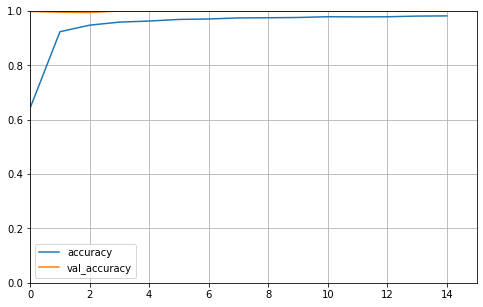

In [19]:
plot_learning_curves(history, 'accuracy', epochs, 0, 1)

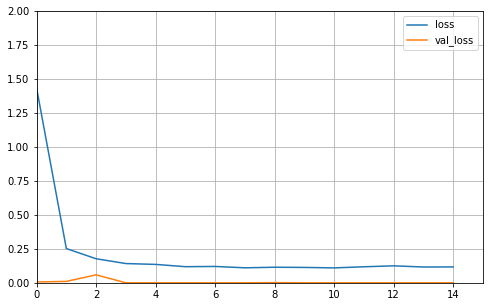

In [20]:
plot_learning_curves(history, 'loss', epochs, 0, 2)

In [21]:
def load_and_preprocess_single_img(path):
    # read the img through file path
    image = tf.io.read_file(path)  
    image = tf.image.decode_jpeg(image, channels=3)
    # 原始图片大小为(128, 128, 3)，重设为(32, 32)
    image = tf.image.resize(image, [24, 24])  
    image = tf.cast(image, tf.float32) / 255.0  # 归一化到[0,1]范围
    image = np.expand_dims(image, axis = 0) # since you have batch_size, so you need to expand your image
    return image

In [22]:
def evaluate_single_pic(path, show=False):
    
    if show:
        import matplotlib.image as mpimg
        plt.imshow(mpimg.imread(path))
    image = load_and_preprocess_single_img(path)
    predict_result = model.predict(image)
    print("This is", label_names[np.argmax(predict_result, axis=1)[0]])

In [23]:
model.save_weights('./checkpoints/mini_map_face_recognition_chk')

In [24]:
model.save('./mini_map_face_recognition.h5')

In [25]:
# test_pic_path2 = "./lol_data_1/test_2/18.png"
# evaluate_single_pic(test_pic_path2, True)